In [3]:
import os
import cv2
import png
import pydicom
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [4]:
def scan_files(directory, prefix=None, postfix=None):
    files_list = []
    for root, sub_dirs, files in os.walk(directory):
        for special_file in files:
            if postfix:
                if special_file.endswith(postfix):
                    files_list.append(os.path.join(root, special_file))
            elif prefix:
                if special_file.startswith(prefix):
                    files_list.append(os.path.join(root, special_file))
            else:
                files_list.append(os.path.join(root, special_file))
    return files_list

In [5]:
dcms = scan_files("/media/tsimage001/TSIMAGE/CT/CT_a784d07a2d539b8a6d9448a3892a5d01/118ba86eedb66f8d2b0b30c83d3762d3", postfix=".dcm")
save_path = "/media/tsimage001/TSIMAGE/CT-png/CT_a784d07a2d539b8a6d9448a3892a5d01/118ba86eedb66f8d2b0b30c83d3762d3"
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [8]:
dcm = dcms[0]
ds = pydicom.dcmread(dcm)
shape = ds.pixel_array.shape
img = ds.pixel_array.astype(float)

/home/tsimage001/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


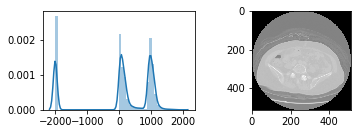

In [11]:
plt.subplot(221)
sns.distplot(img.flatten())
plt.subplot(222)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()